In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
runs_df = pd.read_csv("../data/fix_param_scale_test_6.csv")

In [59]:
runs_ls = []
for i in range(1, 6):
    runs_ls.append(pd.read_csv("../data/fix_param_scale_test_" + str(i) + ".csv"))

In [53]:
runs_ls = []
i, j , k = 0, 0, 0
while k < runs_df.shape[0]:
    k += (i + 1) * 10
    runs_ls.append(runs_df.iloc[j:k, :])
    j = k
    i += 1

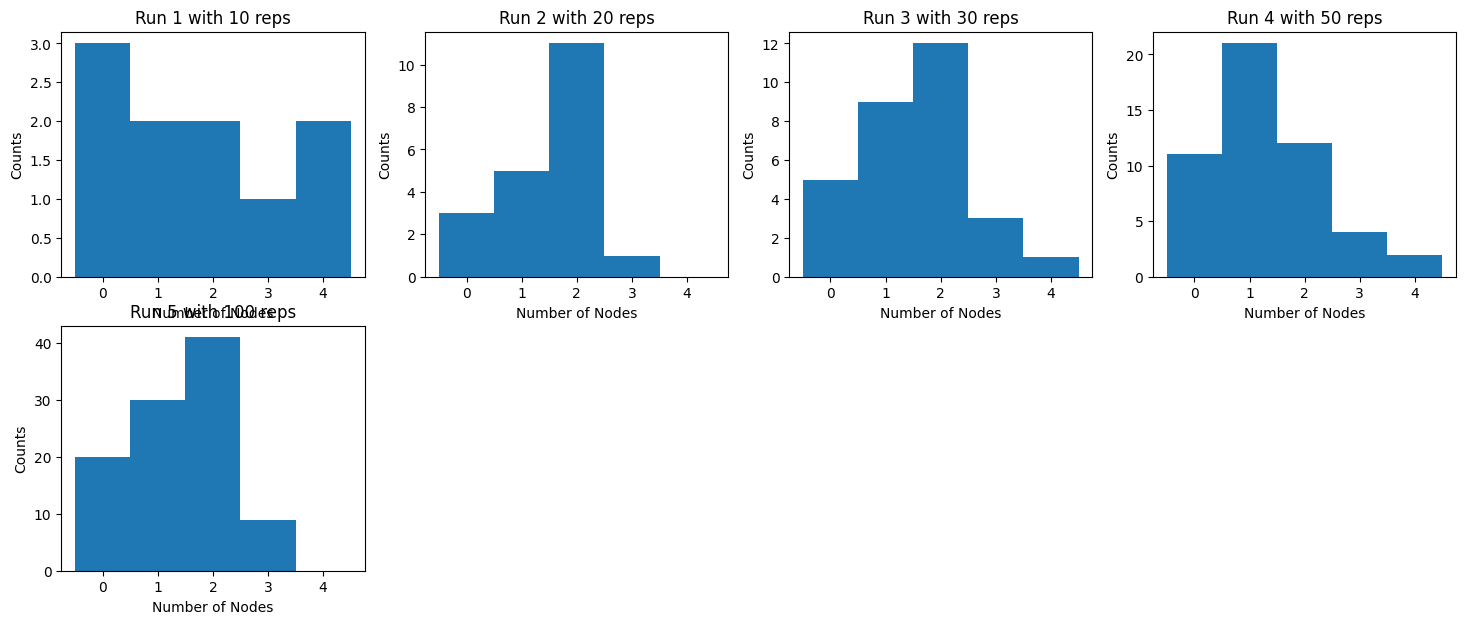

In [60]:
trimmed_runs = [r.iloc[:, 14:] for r in runs_ls]

processed_runs = trimmed_runs

for r in processed_runs:
    for i in range(1, 5):
        r['Polarization Index ' + str(i)] = (r['Average Node ' + str(i) + ' X'] / r['Average Body X'])

annotated_runs = processed_runs

for r in annotated_runs:
    for i in range(1, 5):
        r['Node ' + str(i) + ' is Polarized'] = r['Polarization Index ' + str(i)] > 1.5

for r in annotated_runs:
    node_cols = [f'Node {i} is Polarized' for i in range(1, 5)]
    r['Number of Polarized Nodes'] = r[node_cols].sum(axis=1)

results = annotated_runs

num_runs = len(runs_ls)

plt.figure(figsize=(18, 7 * int(num_runs/3)))

for i in range(1, num_runs + 1):
    plt.subplot(int(num_runs/3) + 1, 4, i)
    plt.hist(results[i - 1]['Number of Polarized Nodes'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
    plt.title('Run ' + str(i) + ' with ' + str(runs_ls[i - 1].shape[0]) + ' reps');
    plt.xlabel('Number of Nodes')
    plt.ylabel('Counts')